In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from pprint import pprint
import pandas as pd

In [ ]:
# Import Hawaii Station Data

from station_model import Hawaii_Station

engine_s = create_engine("sqlite:///hawaii.sqlite")
conn_s = engine_s.connect()
session_s = Session(bind=engine_s)

station_data = session_s.query(Hawaii_Station).limit(10)
for row in station_data:
    pprint(row.__dict__)


In [ ]:
# Import Hawaii Measurement Data

from measurement_model import Hawaii_Measurement

engine_m = create_engine("sqlite:///hawaii.sqlite")
conn_m = engine_m.connect()
session_m = Session(bind=engine_m)

measurement_data = session_m.query(Hawaii_Measurement).limit(10)
for row in station_data:
    pprint(row.__dict__)


# Exploratory Climate Analysis

In [4]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Get the last 12 months of data

measurement_df1 = pd.read_sql("SELECT * FROM measurement", conn_m).dropna(how = 'any') 
# print(measurement_df1)
# print(measurement_df1.head())

# Get max date from table
max_df = pd.read_sql("SELECT max(date) FROM measurement", conn_m)
print(max_df)

    max(date)
0  2017-08-23


In [5]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame

measurement_df2 = pd.read_sql("SELECT date, prcp FROM measurement WHERE date between '2016-08-23' and '2017-08-23'", conn_m)
# print(measurement_df1)
print(measurement_df1.head())

   id      station        date  prcp  tobs
0   1  USC00519397  2010-01-01  0.08  65.0
1   2  USC00519397  2010-01-02  0.00  63.0
2   3  USC00519397  2010-01-03  0.00  74.0
3   4  USC00519397  2010-01-04  0.00  76.0
5   6  USC00519397  2010-01-07  0.06  70.0


In [6]:
# Set the index to the date column and sort the dataframe by date

measurement_df3 = measurement_df2.sort_values(by = 'date').dropna(how = 'any').set_index('date')
print(measurement_df3.head())

            prcp
date            
2016-08-23  0.00
2016-08-23  1.79
2016-08-23  0.05
2016-08-23  0.15
2016-08-23  0.70


In [7]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(measurement_df2.describe())

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


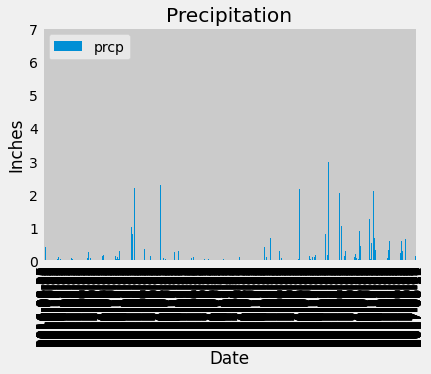

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data

# measurement_plot = measurement_df2.plot(x = 'date', y = 'prcp', kind = 'bar')
# measurement_plot


measurement_df2.plot(
    x="date",
    y='prcp',
    kind="bar",
    title="Precipitation"
)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [28]:
# Design a query to show how many stations are available in this dataset?

# Get all station data
station_df1 = pd.read_sql("SELECT * FROM station",conn_s)
# print(station_df1)
print(station_df1.head())

   id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1   2  USC00513117                    KANEOHE 838.1, HI US   21.4234   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3   4  USC00517948                       PEARL CITY, HI US   21.3934   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

   longitude  elevation  
0  -157.8168        3.0  
1  -157.8015       14.6  
2  -157.8374        7.0  
3  -157.9751       11.9  
4  -158.0111      306.6  


In [ ]:
# Join station data with rainfall data



In [10]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [12]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [13]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
